<a href="https://colab.research.google.com/github/ArindamMukerjee/PyTorch-Notebooks/blob/main/pytorch_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np

In [ ]:
!pip install -U d2l

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
tables 3.7

In [ ]:
x = torch.arange(12, dtype = torch.float32)
x = x.reshape(3, 4)
print(x.shape)
print(x.numel())

torch.Size([3, 4])
12


In [ ]:
x = torch.zeros(2, 3, 4)
x = torch.ones(2, 3, 4)
x = torch.randn(3, 4)
x

tensor([[ 0.8336,  0.1223, -1.8507, -1.2121],
        [-1.0254,  0.4295,  0.1078,  0.0538],
        [-0.3377, -0.3363, -1.1438,  0.7235]])

In [ ]:
x = torch.arange(12, dtype = torch.float32).reshape(3, 4)
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(torch.cat((x, y), dim = 0))
print(torch.cat((x, y), dim = 1))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])
tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


In [ ]:
data = pd.DataFrame([[np.nan, 'Pave', 127500],
              [2, np.nan, 106000],
              [4, np.nan, 178100],
              [np.nan, np.nan, 140000]], columns = ['numrooms', 'alley', 'price'])
data

,numrooms,alley,price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [ ]:
# replacing values with mean
inputs, outputs = data.iloc[:, :2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs = pd.get_dummies(inputs, dummy_na = True)
inputs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,numrooms,alley_Pave,alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [ ]:
# converting to torch tensors
x, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
x, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [ ]:
# dot product
x = torch.arange(4, dtype = torch.float32)
y = torch.ones(4, dtype = torch.float32)
torch.dot(x, y)

a = torch.arange(20, dtype = torch.float32).reshape(5, 4)
print(a.shape, x.shape, torch.mv(a, x))

torch.Size([5, 4]) torch.Size([4]) tensor([ 14.,  38.,  62.,  86., 110.])


In [ ]:
# norm
u = torch.tensor([3.0, -4.0])
print(torch.norm(u))
print(torch.abs(u).sum()) # l1 norm


tensor(5.)
tensor(7.)


In [ ]:
# calculating gradients
x = torch.arange(4.0, requires_grad = True)
y = 2 * torch.dot(x, x)
y.backward()
print(x.grad)

x.grad.zero_()
print(x.grad)
y = x.sum()
y.backward()
print(x.grad)

tensor([ 0.,  4.,  8., 12.])
tensor([0., 0., 0., 0.])
tensor([1., 1., 1., 1.])


In [ ]:
# detaching computation
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
print(x.grad)

# finding gradient wrt y
x.grad.zero_()
y.sum().backward()
print(x.grad)

tensor([0., 1., 4., 9.])
tensor([0., 2., 4., 6.])


### Linear Regression

In [ ]:
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape(-1, 1)

In [ ]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
from torch.utils import data
from torch import nn

In [ ]:
def load_array(data_arrays, batch_size, is_train = True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle = is_train)

In [ ]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 0.2575,  1.1507],
         [-0.4711,  0.3092],
         [-0.0550,  1.0769],
         [-0.3879,  0.1595],
         [-0.9106,  0.2097],
         [-0.6597, -0.4653],
         [-0.8030,  1.1018],
         [-0.2889, -0.4670],
         [ 0.4224, -1.3051],
         [ 1.2518, -0.0626]]), tensor([[ 0.8047],
         [ 2.2129],
         [ 0.4283],
         [ 2.8827],
         [ 1.6623],
         [ 4.4610],
         [-1.1452],
         [ 5.2101],
         [ 9.4962],
         [ 6.9139]])]

In [ ]:
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for x, y in data_iter:
        l = loss(net(x), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000172
epoch 2, loss 0.000092
epoch 3, loss 0.000092


### Fashion MNIST dataset for classification (Linear)


In [ ]:
# cross entropy loss
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6],
                      [0.3, 0.2, 0.5]])
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

In [ ]:
# why not optimze over accuracy
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [ ]:
def load_data_fashion_mnist(batch_size, resize = None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root = '../data', train = True, transform = trans, download = True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root = '../data', train = False, transform = trans, download = True)
    return (data.DataLoader(mnist_train, batch_size, shuffle = True, 
                            num_workers = 4),
            data.DataLoader(mnist_test, batch_size, shuffle = False,
                            num_workers = 4))

In [ ]:
num_inputs = 784
num_outputs = 10
w = torch.normal(0, 0.01, size = (num_inputs, num_outputs), requires_grad = True)
b = torch.zeors(num_outputs, requires_grad = True)

In [ ]:
def accuracy(y_hat, y):
    y_hat = y_hat.argmax(axis = 1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.sum())    

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = d2l.Animator(xlabel = 'epoch', xlim = [1, num_epochs], ylim = [0.3, 0.9],
                            legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        # training loop
        net.train()
        metric = d2l.Accumulator(3)
        for x, y in train_iter:
            y_hat = net(x)
            l = loss(y_hat, y)
            updater.zero_grad()
            l.mean().backward()
            updater.step()
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
        train_metrics = metric[0]/metric[2], metric[1]/metric[2]

        # evaluation
        net.eval()
        metric = d2l.Accumulator(2)
        with torch.no_grad():
            for x, y, in test_iter:
                metric.add(accuracy(net(x), y), y.numel())
        test_acc = metric[0] / metric[1]
        animator.add(epoch + 1, train_metrics + (test_acc, ))
    train_loss, train_acc = train_metrics

In [ ]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)
net.apply(init_weights)

In [ ]:
loss = nn.CrossEntropyLoss(reduction = 'none')
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)
num_epochs = 10

In [ ]:
?torch.zeros_like

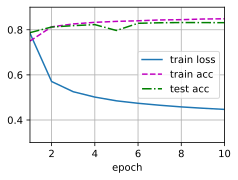

In [ ]:
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### Multi-Layer Classification

In [ ]:
import torch
from torch import nn
from torch.nn.modules.loss import CrossEntropyLoss

In [ ]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

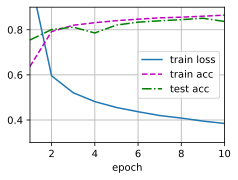

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction = 'none')
trainer = torch.optim.SGD(net.parameters(), lr = lr)
train_iter, test_iter = load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### Weight Decay

In [ ]:
import torch
from torch import nn

In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iters = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iters = d2l.load_array(test_data, batch_size, is_train = False)

In [ ]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction = 'none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([
                            {'params' : net[0].weight, 'weight_decay' : wd},
                            {'params' : net[0].bias}], lr = lr)
    animator = d2l.Animator(xlabel = 'epochs', ylabel = 'loss', yscale = 'log',
                            xlim = [5, num_epochs], legend = ['train', 'test'])
    for epoch in range(num_epochs):
        for x, y in train_iters:
            trainer.zero_grad()
            l = loss(net(x), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iters, loss),
                                    d2l.evaluate_loss(net, test_iters, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 13.299017906188965


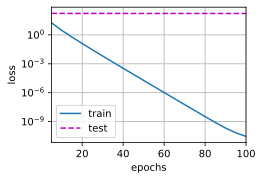

In [ ]:
train_concise(0)

L2 norm of w: 0.41808992624282837


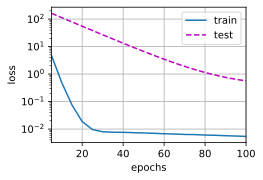

In [ ]:
train_concise(3)

### Dropout

In [ ]:
dropout1, dropout2 = 0.2, 0.5
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction = 'none')
train_iter, test_iter = load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(256, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

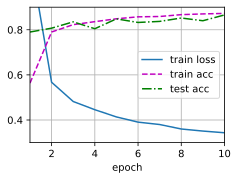

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## Kaggle Housing Price Prediction

In [ ]:
train_data = pd.read_csv(d2l.download('kaggle_house_train'))
test_data = pd.read_csv(d2l.download('kaggle_house_test'))

In [ ]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [ ]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x : ( x- x.mean() / x.std()))
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [ ]:
all_features = pd.get_dummies(all_features, dummy_na = True)

In [ ]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype = torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype = torch.float32)
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype = torch.float32)

In [ ]:
loss = nn.MSELoss()
in_features = train_features.shape[1]
def get_net():
    net = nn.Sequential(nn.Linear(in_features, 1))
    return net

In [ ]:
def log_rmse(net, features, labels):
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds), torch.log(labels)))
    return rmse.item()

In [ ]:
def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate,
          weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = load_array((train_features, train_labels), batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for x, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(x), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [ ]:
# do the k-fold cross validation later